# MAT281 - Tarea N°02


## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Alexei Arenas Bahamondes

* __Rol__: 201910513-2

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
   
4.- Esta Tarea debe ser entregada en **Dos Jupyter Notebooks Distinto**.
   * **Ejemplo**: `hw_02_part_01.ipynb`, `hw_02_part_02.ipynb`.

# LearnPlatform

La pandemia COVID-19 ha interrumpido el aprendizaje de más de 56 millones de estudiantes en los Estados Unidos. En la primavera de 2020, la mayoría de los gobiernos estatales y locales de los EE. UU. Cerraron las instituciones educativas para detener la propagación del virus. En respuesta, las escuelas y los maestros han intentado llegar a los estudiantes de forma remota a través de herramientas de aprendizaje a distancia y plataformas digitales. Hasta el día de hoy, las preocupaciones sobre la exacerbación de la brecha digital y la pérdida de aprendizaje a largo plazo entre los estudiantes más vulnerables de Estados Unidos continúan creciendo.

#### Preguntas clave:
1. ¿Cuál fue el estado del aprendizaje digital en 2020?
2. ¿Cómo se relaciona la participación digital con factores demográficos y socioeconómicos?
3. ¿Qué relvancia tuvieron las plataformas digitales para los estudiantes?

#### Metodología:
1. Exploración y visualización de los datos.
2. Análisis de tendencias y correlaciones.
3. Gráficos y responder preguntas.

## Cargar Datos

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de visualización
plt.style.use('ggplot')
sns.set_theme()

# Cargar datos
districts = pd.read_csv('data/districts_info.csv')
products = pd.read_csv('data/products_info.csv')

engagement = 'data/engagement_data'
dataframes = []

# Iterar sobre todos los archivos CSV en la carpeta
for file in os.listdir(engagement):
    if file.endswith('.csv'):  # Solo procesar archivos CSV
        district_id = int(file.split('.')[0])  # Convierte el nombre a entero
        df = pd.read_csv(os.path.join(engagement, file))
        df['district_id'] = district_id
        dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
engagement_data = pd.concat(dataframes, ignore_index=True)

In [6]:
print("Productos:", products.shape)
print("Distritos:", districts.shape)
print("Engagement:", engagement_data.shape)

Productos: (372, 6)
Distritos: (233, 7)
Engagement: (22324190, 5)


## Exploración

Veamos como son las columas de los archivos y si tiene datos faltantes

In [9]:
print("Districts Info:")
districts.info()
districts.head()

Districts Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Products Info:")
products.info()
products.head()

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [11]:
print("Engagement Data:")
engagement_data.info()
engagement_data.head()

Engagement Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 851.6+ MB


,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,93690.0,0.00,NaN,1000
1,2020-01-01,17941.0,0.03,0.90,1000
2,2020-01-01,65358.0,0.03,1.20,1000
3,2020-01-01,98265.0,0.57,37.79,1000
4,2020-01-01,59257.0,0.00,NaN,1000


## Preprocesado

In [13]:
# Convertir fechas en engagement data
engagement_data['time'] = pd.to_datetime(engagement_data['time'])

# Crear nuevas columnas
engagement_data['month'] = engagement_data['time'].dt.month
engagement_data['week'] = engagement_data['time'].dt.isocalendar().week

In [14]:
# Unir engagement_data con products_info usando lp_id
products.rename(columns={'LP ID': 'lp_id'}, inplace=True)
engagement_products = engagement_data.merge(products, on='lp_id', how='left')

# Unir el resultado con districts_info usando district_id
merged_data = engagement_products.merge(districts, on='district_id', how='left')

In [15]:
# Mostrar información de los datos combinados
print("Datos combinados (merged_data):")
merged_data.info()
merged_data.head()

Datos combinados (merged_data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 18 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   time                        datetime64[ns]
 1   lp_id                       float64       
 2   pct_access                  float64       
 3   engagement_index            float64       
 4   district_id                 int64         
 5   month                       int32         
 6   week                        UInt32        
 7   URL                         object        
 8   Product Name                object        
 9   Provider/Company Name       object        
 10  Sector(s)                   object        
 11  Primary Essential Function  object        
 12  state                       object        
 13  locale                      object        
 14  pct_black/hispanic          object        
 15  pct_free/reduced            obje

,time,lp_id,pct_access,engagement_index,district_id,month,week,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-01,93690.0,0.00,NaN,1000,1,1,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference",Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
1,2020-01-01,17941.0,0.03,0.90,1000,1,1,https://www.kidsa-z.com/main/Login,Kids A-Z,Lazel Inc.,PreK-12,LC - Digital Learning Platforms,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
2,2020-01-01,65358.0,0.03,1.20,1000,1,1,http://www.prezi.com,Prezi,Prezi Inc.,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
3,2020-01-01,98265.0,0.57,37.79,1000,1,1,http://quizlet.com/,Quizlet,Quizlet,PreK-12,LC - Study Tools,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
4,2020-01-01,59257.0,0.00,NaN,1000,1,1,http://www.issuu.com,Issuu,Issuu,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN


## EDA

### Pregunta 1

*¿Cuál es el estado de la conectividad en 2020?*

Veamos cómo varió el acceso digital de los estudiantes a lo largo del año 2020.

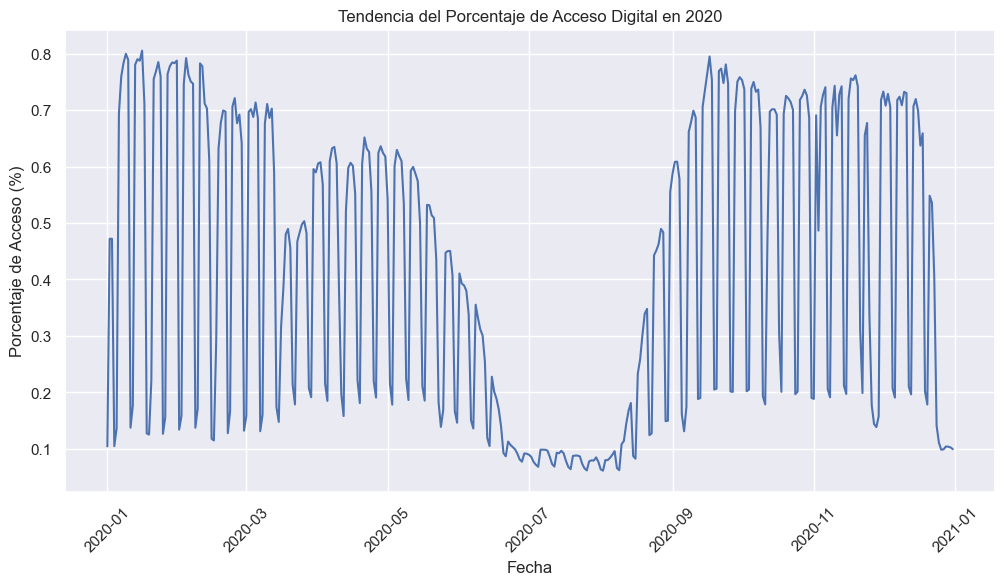

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=engagement_data, x='time', y='pct_access', errorbar=None)
plt.title('Tendencia del Porcentaje de Acceso Digital en 2020')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de Acceso (%)')
plt.xticks(rotation=45)
plt.show()

Observaciones: Hay una fluctuación significativa en el porcentaje de acceso digital a lo largo de 2020. Se observan picos y caídas regulares que podrían estar relacionados con los días de semana y fines de semana (mayor acceso en días laborales, menor en fines de semana). El acceso parece disminuir durante los meses de verano (junio-julio), lo cual coincide con las vacaciones escolares en Estados Unidos, y aumenta en septiembre debido al regreso a clases

Ahora, analizemos el acceso digital dependiendo del Estado en el que nos encontremos

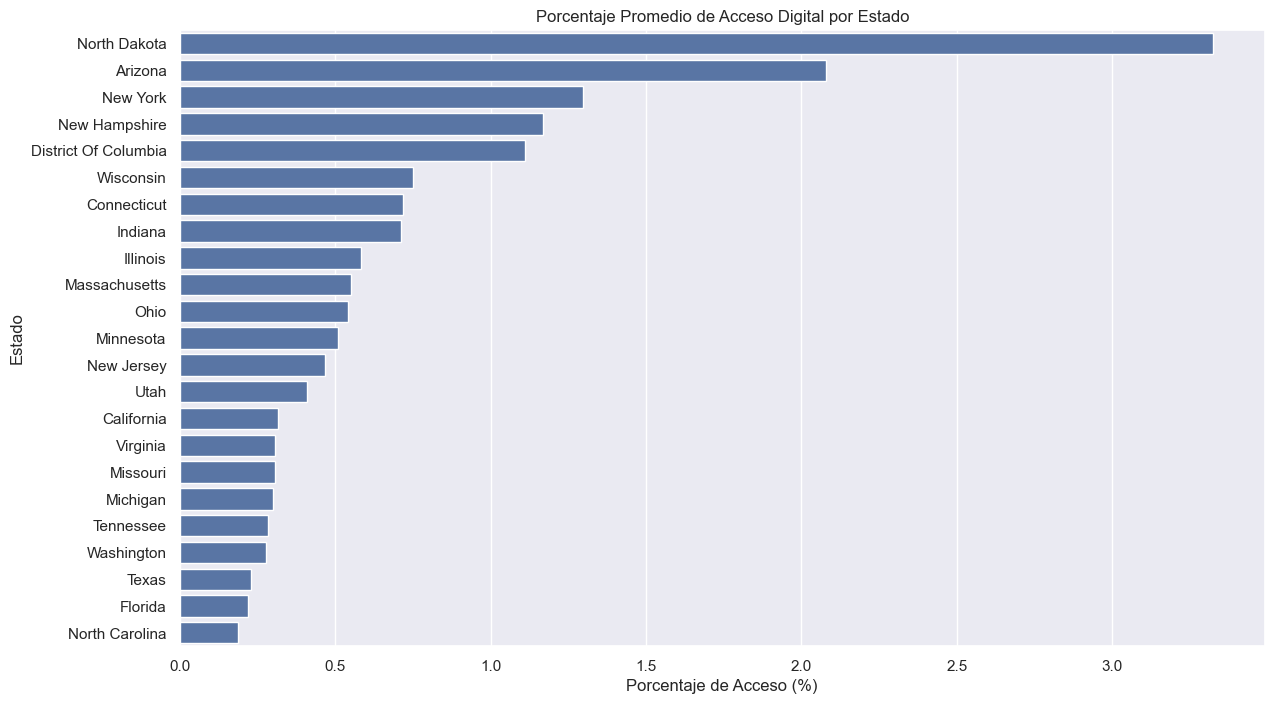

In [23]:
state_access = merged_data.groupby('state')['pct_access'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=state_access, x='pct_access', y='state')
plt.title('Porcentaje Promedio de Acceso Digital por Estado')
plt.xlabel('Porcentaje de Acceso (%)')
plt.ylabel('Estado')
plt.show()

Observaciones: Hay una clara desigualdad en el acceso digital entre los estados. Por ejemplo, estados como North Dakota, Arizona y New York tienen porcentajes de acceso significativamente más altos en comparación con otros como North Carolina y Florida. Una posible hipótesis es que los estados más conectados tienden a estar en regiones con mayores recursos o políticas educativas más desarrolladas.

Observemos como varía el acceso digital en base al tipo de localidad.

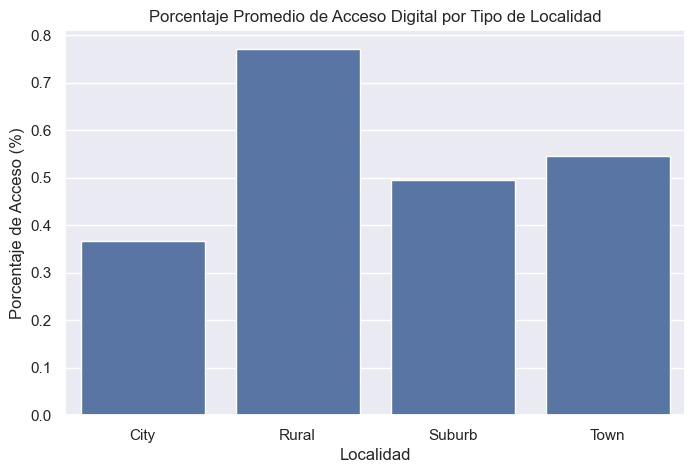

In [26]:
locale_access = merged_data.groupby('locale')['pct_access'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=locale_access, x='locale', y='pct_access')
plt.title('Porcentaje Promedio de Acceso Digital por Tipo de Localidad')
plt.xlabel('Localidad')
plt.ylabel('Porcentaje de Acceso (%)')
plt.show()

Observaciones: Las áreas rurales tienen un porcentaje de acceso digital sorpresivamente alto, seguidas por suburbios y pueblos. Las ciudades tienen el porcentaje más bajo. Esto podría deberse a la menor densidad de población que hay en zonas rurales.

Por último, veamos como varía el acceso digital a lo largo del año para 4 Estados representativos.

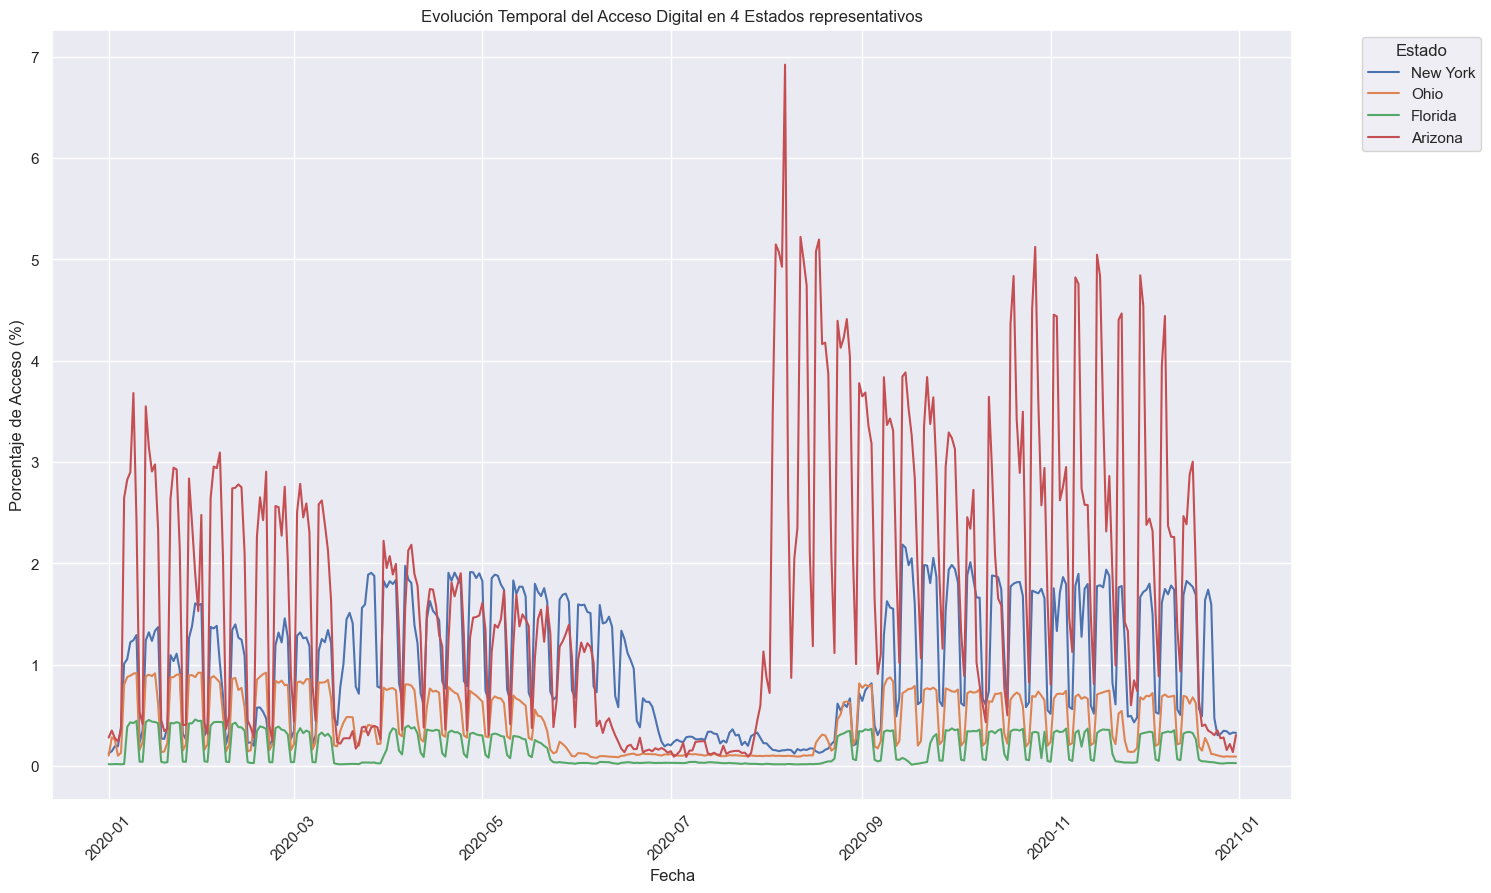

In [29]:
plt.figure(figsize=(16, 10))
states = ['Arizona','New York','Ohio','Florida']
sns.lineplot(data=merged_data[merged_data['state'].isin(states)], x='time', y='pct_access', hue='state', errorbar=None)
plt.title('Evolución Temporal del Acceso Digital en 4 Estados representativos')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de Acceso (%)')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Observaciones: Arizona muestra un acceso alto a lo largo del año, lo que refleja una infraestructura digital sólida. Estados como Florida y Ohio tienen un acceso mucho más bajo y menos consistente a lo largo del año. Se nota una mayor regularidad en los estados con alto acceso, lo que sugiere menor vulnerabilidad a interrupciones para estos Estados.

#### Conclusión 
El análisis revela una conectividad digital desigual en los Estados Unidos. Algunos estados sobresalen en accesibilidad, mientras que otros enfrentan mayores retos. El acceso varía según el calendario escolar, con caídas evidentes en verano y los fines de semana. Sorprendentemente, las áreas rurales parecen estar mejor conectadas que las urbanas, posiblemente debido a políticas específicas para mitigar el aislamiento.

### Pregunta 2

*¿Cómo se relaciona la participación digital con factores demográficos y socioeconómicos?*

Veamos cuánto participaron los estudiantes Afroamericanos/Hispanos.

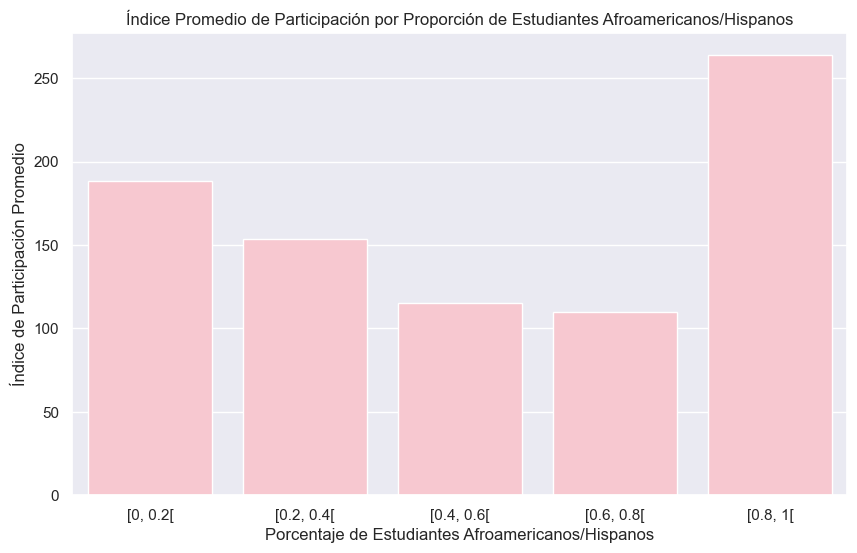

In [77]:
avg_participation = merged_data.groupby('pct_black/hispanic')['engagement_index'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_participation, x='pct_black/hispanic', y='engagement_index', color = 'pink')
plt.title('Índice Promedio de Participación por Proporción de Estudiantes Afroamericanos/Hispanos')
plt.xlabel('Porcentaje de Estudiantes Afroamericanos/Hispanos')
plt.ylabel('Índice de Participación Promedio')
plt.show()

Observaciones: Los distritos con una alta proporción de estudiantes afroamericanos/hispanos ([0.8, 1[) tienen el índice promedio de participación más alto.

Además, observemos la relación entre la participación y el tipo de localidad de los estudiantes.

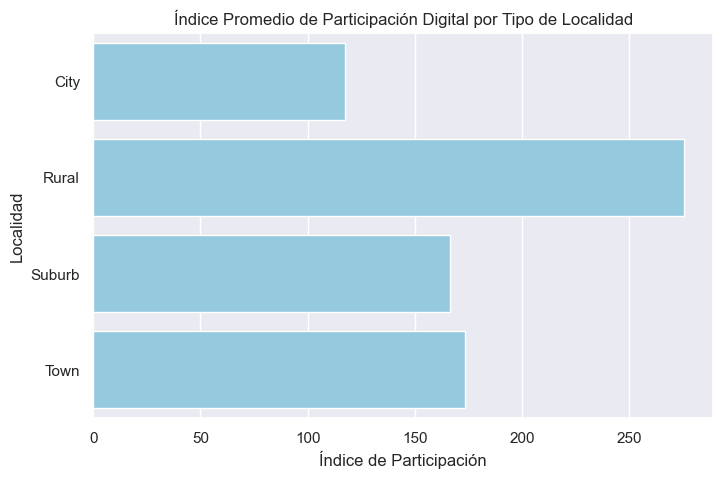

In [75]:
plt.figure(figsize=(8, 5))
sns.barplot(data=locale_participation, y='locale', x='engagement_index', color='skyblue')
plt.title('Índice Promedio de Participación Digital por Tipo de Localidad')
plt.xlabel('Índice de Participación')
plt.ylabel('Localidad')
plt.show()

Observaciones: las áreas rurales tienen el índice promedio de participación digital más alto, seguidas de los suburbios y los pueblos.
Las ciudades tienen el índice más bajo, lo cual podría deberse a temas de desigualdad económica.

Usemos gráfico de líneas desglosado para entender cómo cambió la participación digital en el tiempo para distintos niveles socioeconómicos.

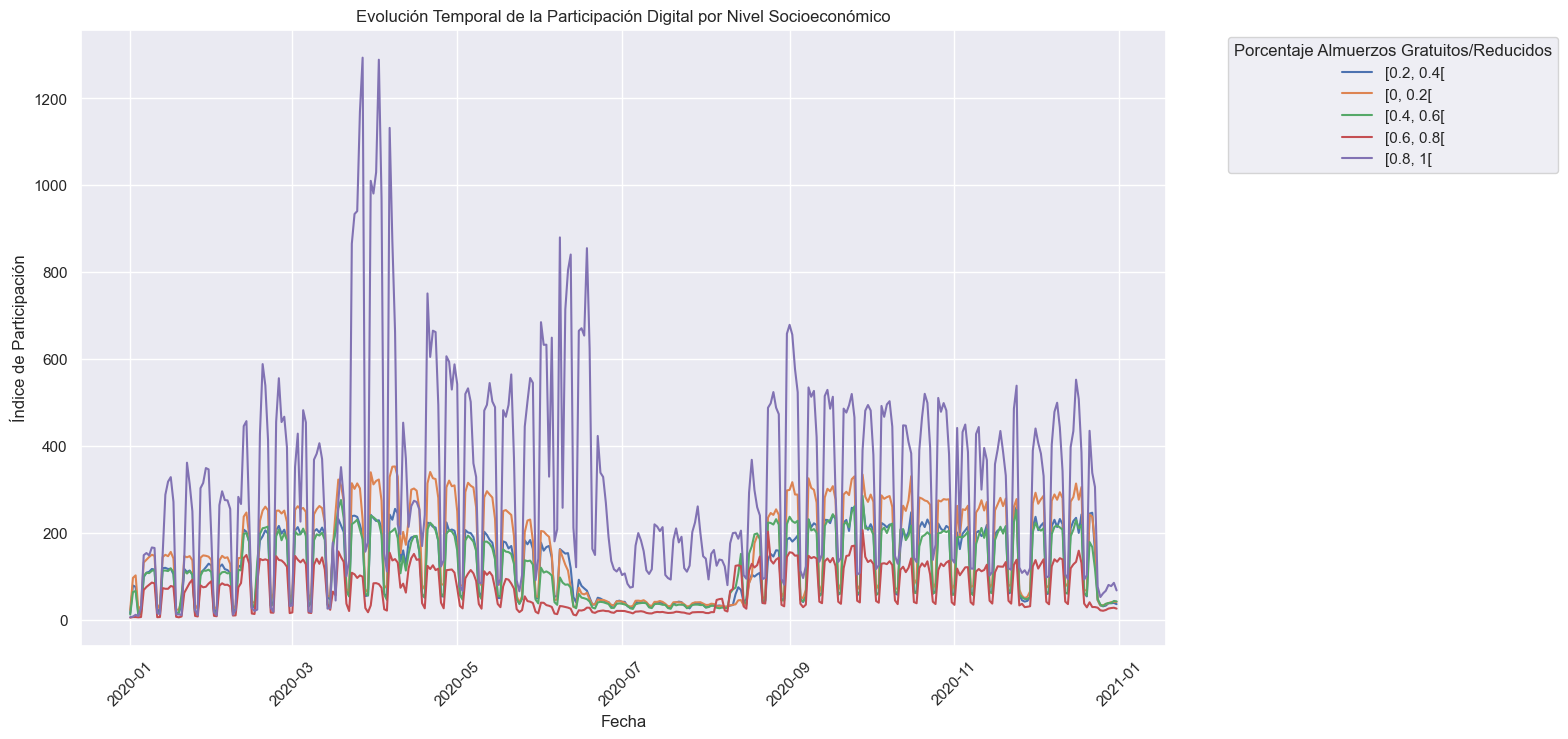

In [62]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_data, x='time', y='engagement_index', hue='pct_free/reduced', errorbar=None)
plt.title('Evolución Temporal de la Participación Digital por Nivel Socioeconómico')
plt.xlabel('Fecha')
plt.ylabel('Índice de Participación')
plt.xticks(rotation=45)
plt.legend(title='Porcentaje Almuerzos Gratuitos/Reducidos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observaciones: los distritos con mayores porcentajes de estudiantes con almuerzos gratuitos/reducidos ([0.8, 1[) tienen un índice de participación digital más alto en comparación con el resto.

Por último, analizemos cómo cambian los niveles de participación entre localidad y proporción demografica de estudiantes.

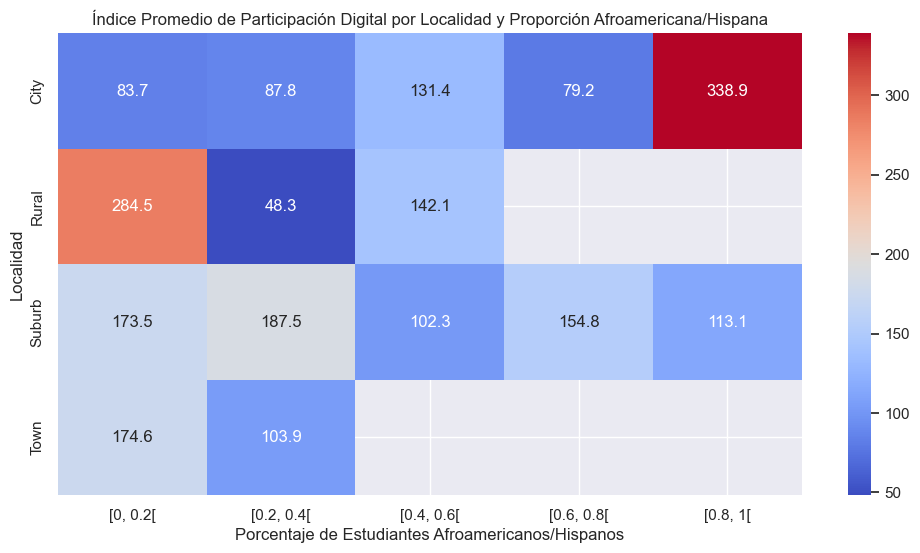

In [64]:
heatmap_data = merged_data.pivot_table(index='locale', columns='pct_black/hispanic', values='engagement_index', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Índice Promedio de Participación Digital por Localidad y Proporción Afroamericana/Hispana')
plt.xlabel('Porcentaje de Estudiantes Afroamericanos/Hispanos')
plt.ylabel('Localidad')
plt.show()

Observaciones: las áreas rurales con una alta proporción de estudiantes afroamericanos/hispanos ([0.8, 1[) tienen índices de participación digital más altos.

#### Conclusión

A partir de los datos podemos observar que los distritos con altas proporciones afroamericanas/hispanas tienden a tener mayor participación digital, aunque esto varía según la localidad. Además, los distritos más vulnerables socioeconómicamente parecen beneficiarse de algún incentivo (estatal probablemente) específico que asegura una participación digital alta. Finalmente, las áreas rurales muestran índices promedio más altos que las urbanas, lo cual podría reflejar esfuerzos enfocados en superar desafíos de infraestructura.

### Pregunta 3

*¿Qué relvancia tuvieron las plataformas digitales para los estudiantes?*

Grafiquemos las 10 plataformas mas relevantes.

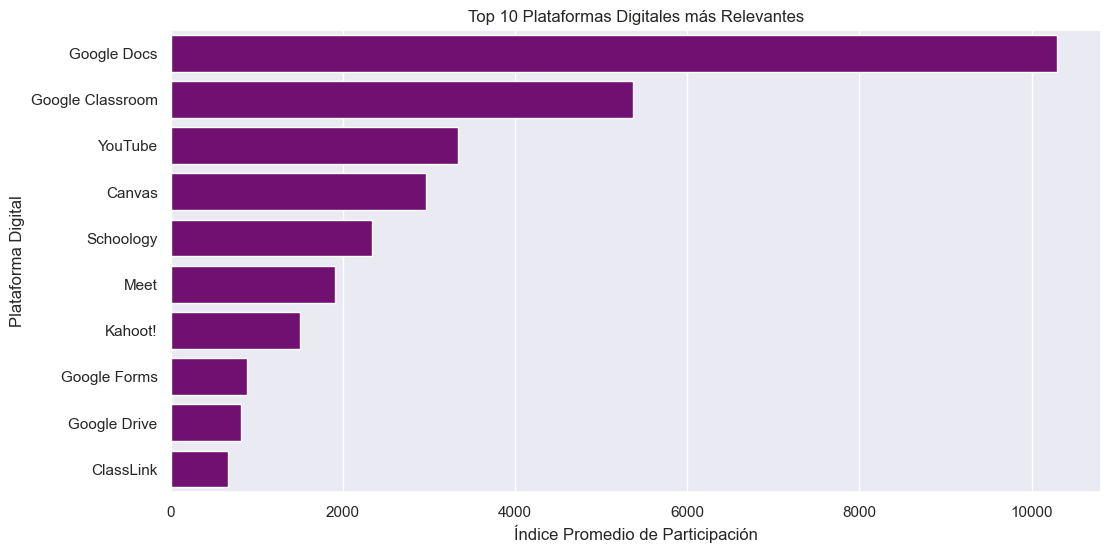

In [124]:
top_platforms = merged_data.groupby('Product Name')['engagement_index'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_platforms, x='engagement_index', y='Product Name', color='purple')
plt.title('Top 10 Plataformas Digitales más Relevantes')
plt.xlabel('Índice Promedio de Participación')
plt.ylabel('Plataforma Digital')
plt.show()

Observaciones: Google Docs y Google Classroom son, por mucho, las plataformas más utilizadas y relevantes para los estudiantes. Otras plataformas importantes incluyen YouTube, Canvas, Schoology y Meet, lo que indica una mezcla de herramientas para aprendizaje colaborativo, comunicación y acceso a contenido multimedia.

Analizamos cómo cambió el uso de las plataformas principales en el tiempo.

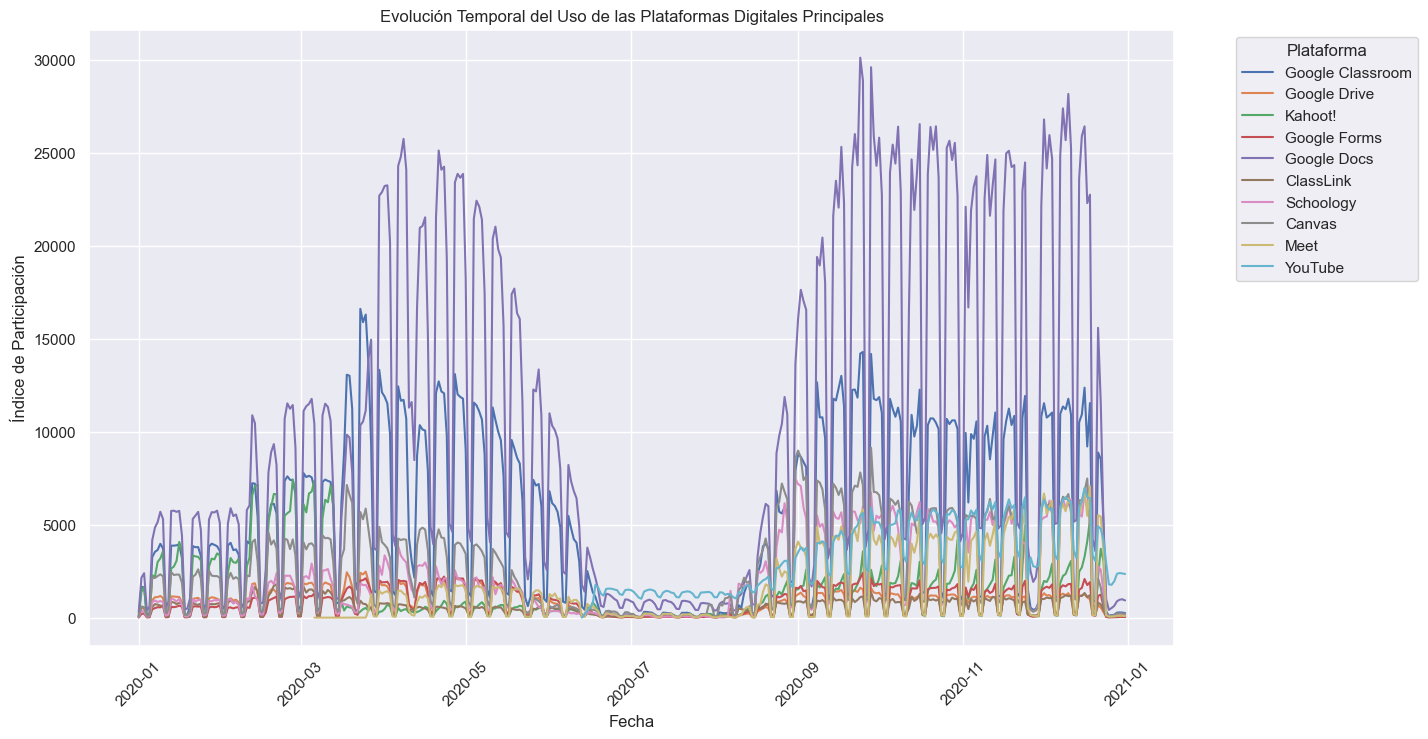

In [128]:
top_products = top_platforms['Product Name'].tolist()
plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_data[merged_data['Product Name'].isin(top_products)], x='time', y='engagement_index', hue='Product Name', errorbar=None)
plt.title('Evolución Temporal del Uso de las Plataformas Digitales Principales')
plt.xlabel('Fecha')
plt.ylabel('Índice de Participación')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Observaciones: Google Classroom y Google Docs muestran un uso sostenido, mientras que otras plataformas como Kahoot! tienen un uso más esporádico, probablemente en actividades específicas.

Comparamos cómo las plataformas se desempeñaron en diferentes tipos de localidad.

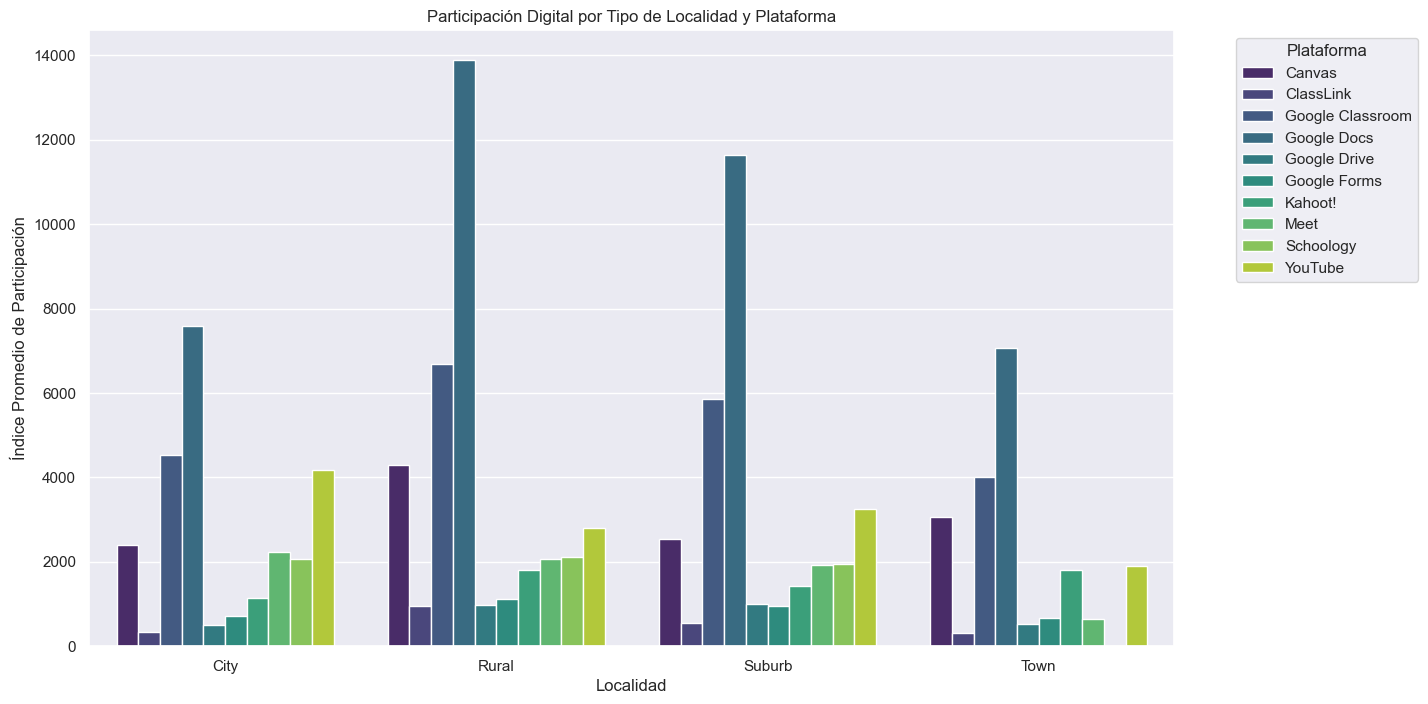

In [133]:
platform_locale = merged_data[merged_data['Product Name'].isin(top_products)].groupby(['Product Name', 'locale'])['engagement_index'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=platform_locale, x='locale', y='engagement_index', hue='Product Name', palette='viridis')
plt.title('Participación Digital por Tipo de Localidad y Plataforma')
plt.xlabel('Localidad')
plt.ylabel('Índice Promedio de Participación')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observaciones: En áreas rurales, Google Classroom es claramente la herramienta más utilizada, seguida de Google Docs, lo que podría deberse a la facilidad de acceso y la integración que estas plataformas ofrecen. En áreas urbanas y suburbanas, la distribución es más balanceada, con mayor diversidad en las plataformas utilizadas (por ejemplo YouTube, Meet, Schoology).

#### Conclusión

A la luz de los resultados obtenidos podemos decir que las herramientas de Google (Docs, Classroom, Meet) fueron fundamentales para mantener la continuidad educativa, especialmente en el contexto de aprendizaje remoto. Además de las herramientas de colaboración, plataformas multimedia como YouTube y Canvas jugaron un papel clave en la pandemia, lo que resalta la importancia del acceso a contenido audiovisual y sistemas de gestión de aprendizaje. En áreas rurales, la dependencia de plataformas integradas como Google Classroom refleja la necesidad de simplicidad y accesibilidad.

## Comentarios Finales

Las plataformas digitales han demostrado ser fundamentales en esta época de crisis y seguirán desempeñando un papel clave en la educación. Sin embargo, para cerrar la brecha digital, es esencial garantizar que las herramientas sean accesibles, inclusivas y efectivas en todos los contextos.

Aunque hay avances, persisten desigualdades significativas en acceso, diversidad de herramientas y habilidades digitales. Los sistemas educativos deben enfocarse en invertir en infraestructura tecnológica y formación digital para todos los actores educativos.

También se espera que las plataformas digitales puedan ser utilizadas estratégicamente para recuperar el aprendizaje perdido y apoyar el progreso continuo. La integración de herramientas multimedia, interactivas y colaborativas será crucial para garantizar una experiencia educativa satisfactoria.